In [1]:
# Problem Statement:
## - A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
## - In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
## - They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

## - Which variables are significant in predicting the demand for shared bikes.
## - How well those variables describe the bike demands

## - Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

In [2]:
# We have to create a multiple linear regression model
# For this purpose, the steps we will follow are:
# 1. Reading, understanding & visualizing the data
# 2. Preparing the data for modeling (i.e. train_test split, rescaling, etc.)
# 3. Training the model
# 4. Residual Analysis
# 5. Predictions & Evaluation on the test set

In [3]:
# Step-1: Reading & Understanding the Data:

In [4]:
# All necessary packages & modules will be imported in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the data
bikesharing=pd.read_csv('Downloads/day.csv')
# To take a look at dataset
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# To take a look at shape of dataset
bikesharing.shape

(730, 16)

In [7]:
# To take a look at the info of the dataset
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Now we know that the dataset has no null values
# Now we will look at the description of the dataset
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Convert categorical variables to categorical string values
# Use a dictionary to map numeric values to labels
weather_mapping = {1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'}
season_mapping = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

bikesharing['weathersit'] = bikesharing['weathersit'].map(weather_mapping)
bikesharing['season'] = bikesharing['season'].map(season_mapping)
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Convert 'mnth' and 'weekday' to categorical variables
bikesharing['mnth'] = bikesharing['mnth'].astype('category')
bikesharing['weekday'] = bikesharing['weekday'].astype('category')

In [11]:
#Now let's see the data info
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    object  
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    object  
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(7), object(3)
memory usage: 82.1+ KB


In [12]:
#Creating dummy variables
bikesharing = pd.get_dummies(bikesharing, columns=['weathersit'], dtype=int)
bikesharing = pd.get_dummies(bikesharing, columns=['season'], drop_first=True,dtype=int)
bikesharing.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bikesharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 20)
(220, 20)


In [14]:
#Standardising the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
vars=['temp','atemp','hum','windspeed']
df_train[vars]=scaler.fit_transform(df_train[vars])
df_train.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
576,577,31-07-2019,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,968,6248,7216,1,0,0,0,0,0
426,427,03-03-2019,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,956,3110,4066,0,0,1,1,0,0
728,729,30-12-2019,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,1796,1,0,0,1,0,0
482,483,28-04-2019,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,1120,3100,4220,0,0,1,0,1,0
111,112,22-04-2018,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,177,1506,1683,0,0,1,0,1,0


In [15]:
# Step-3: Training the Model

In [16]:
# Making x_train, y_train sets
# Separate features and target variable
X_train = df_train.drop(['instant','dteday','casual','registered','cnt'], axis=1)
y_train = df_train.pop('cnt')
X_train.head()
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [17]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,1,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0,0,1,1,0,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,0,1,0,1,0
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,0,1,0,1,0


In [18]:
#importing statsmodel module
import statsmodels.api as sm

# We will build a model with all variables & then manually remove variables
#Build a model with all variables

# Adding a constant to X_train dataset
X_train_sm=sm.add_constant(X_train)


In [20]:
# Building a model
lr=sm.OLS(y_train,X_train_sm)

In [22]:
# Fitting the model
lr_model=lr.fit()
# View the parameters of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          3.01e-182
Time:                        22:47:13   Log-Likelihood:                -4130.0
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   913.9276    279.830      3.266      0.001     364.127    1463.728
yr                     2018.3005     72.858     27.702      0.000    1875.151    2161.450
mnth                     11.7873     20.378      0.578      0.563     -28.250      51.825
holiday                -554.5754    235.862     -2.351      0.019   -1017.990     -91.160
weekday                  69.9874     18.045      3.878      0.000      34.532     105.443
workingday              162.7576     79.049      2.059      0.040       7.445     318.071
temp                   3762.6174   1206.855      3.118      0.002    1391.427    6133.808
atemp                   545.9501   1233.278      0.443      0.658   -1877.154    2969.054
hum                   -1113.2667    338.617     -3.288      0.001   -1778.570    -447.964
windspeed             -1550.1491    234.963     -6.597      0.000   -2011.797   -1088.502
weathersit_Clear       1182.0202     99.904     11.832      0.000     985.733    1378.308
weathersit_Light Rain  -958.3994    202.199     -4.740      0.000   -1355.673    -561.125
weathersit_Mist         690.3068    117.151      5.892      0.000     460.132     920.482
season_Spring          -603.9937    200.451     -3.013      0.003    -997.833    -210.155
season_Summer           411.1315    135.844      3.027      0.003     144.230     678.033
season_Winter           725.4411    162.216      4.472      0.000     406.724    1044.158
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                     5.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
# Checking VIF

#importing the required module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables & their respective VIF values
vif=pd.DataFrame()

vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,temp,57.99
9,weathersit_Clear,57.54
6,atemp,53.56
11,weathersit_Mist,37.40
12,season_Spring,5.78
10,weathersit_Light Rain,4.60
1,mnth,3.89
14,season_Winter,3.83
13,season_Summer,2.68
7,hum,1.90


In [26]:
# Now we will remove the variables which have high VIF Value & high p-value.
# "atemp" has high p-value : 0.658 & VIF : 53.56. Hence, we will eliminate this variable

In [27]:
# Dropping atemp variable
X=X_train.drop('atemp',axis=1)

In [28]:
# Creating another model
X_train_sm=sm.add_constant(X)
# Create Model
lr=sm.OLS(y_train,X_train_sm)
# Fitting the model
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          2.35e-183
Time:                        23:11:21   Log-Likelihood:                -4130.1
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   910.7829    279.513      3.258      0.001     361.608    1459.957
yr                     2017.7101     72.787     27.721      0.000    1874.701    2160.719
mnth                     11.8304     20.361      0.581      0.561     -28.174      51.835
holiday                -559.1030    235.450     -2.375      0.018   -1021.704     -96.502
weekday                  69.5735     18.007      3.864      0.000      34.195     104.952
workingday              162.5549     78.984      2.058      0.040       7.371     317.739
temp                   4280.4482    296.689     14.427      0.000    3697.526    4863.370
hum                   -1106.8963    338.036     -3.274      0.001   -1771.056    -442.737
windspeed             -1570.2309    230.355     -6.817      0.000   -2022.823   -1117.639
weathersit_Clear       1183.5305     99.764     11.863      0.000     987.517    1379.543
weathersit_Light Rain  -963.6220    201.691     -4.778      0.000   -1359.896    -567.348
weathersit_Mist         690.8744    117.049      5.902      0.000     460.901     920.848
season_Spring          -594.5106    199.141     -2.985      0.003    -985.775    -203.247
season_Summer           421.4749    133.711      3.152      0.002     158.766     684.184
season_Winter           737.4199    159.814      4.614      0.000     423.425    1051.415
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                     5.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
# Checking VIF

#importing the required module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables & their respective VIF values
vif=pd.DataFrame()

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,weathersit_Clear,57.53
10,weathersit_Mist,37.39
11,season_Spring,5.72
9,weathersit_Light Rain,4.59
1,mnth,3.89
13,season_Winter,3.72
5,temp,3.51
12,season_Summer,2.61
6,hum,1.90
7,windspeed,1.20


In [38]:
# Now lets eliminate "mnth" variable which has high p-value : 0.561
# Dropping mnth variable
X=X_train.drop(columns=['atemp','mnth'],axis=1)

In [39]:
# Creating another model
X_train_sm=sm.add_constant(X)
# Create Model
lr=sm.OLS(y_train,X_train_sm)
# Fitting the model
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.89e-184
Time:                        23:25:23   Log-Likelihood:                -4130.3
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   963.1531    264.405      3.643      0.000     443.663    1482.643
yr                     2016.0783     72.684     27.737      0.000    1873.272    2158.885
holiday                -554.0976    235.135     -2.357      0.019   -1016.079     -92.116
weekday                  70.1663     17.966      3.906      0.000      34.868     105.464
workingday              161.5977     78.914      2.048      0.041       6.552     316.643
temp                   4287.7701    296.224     14.475      0.000    3705.765    4869.775
hum                   -1088.4793    336.323     -3.236      0.001   -1749.269    -427.690
windspeed             -1567.2090    230.143     -6.810      0.000   -2019.382   -1115.036
weathersit_Clear       1204.5845     92.889     12.968      0.000    1022.080    1387.089
weathersit_Light Rain  -950.3655    200.263     -4.746      0.000   -1343.831    -556.900
weathersit_Mist         708.9341    112.772      6.286      0.000     487.366     930.503
season_Spring          -646.8830    177.456     -3.645      0.000    -995.539    -298.227
season_Summer           386.1607    119.020      3.245      0.001     152.317     620.004
season_Winter           775.3577    145.770      5.319      0.000     488.956    1061.759
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                     2.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# Checking VIF

#importing the required module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables & their respective VIF values
vif=pd.DataFrame()

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
7,weathersit_Clear,49.71
9,weathersit_Mist,33.42
10,season_Spring,4.55
8,weathersit_Light Rain,4.30
4,temp,3.50
12,season_Winter,3.10
11,season_Summer,2.07
5,hum,1.88
6,windspeed,1.20
1,holiday,1.08


In [41]:
# Now lets eliminate "weathersit_Clear" variable as it has high VIF : 49.71
#Dropping "weathersit_Clear" variable
X=X_train.drop(columns=['atemp','mnth','weathersit_Clear'],axis=1)

In [42]:
# Creating another model
X_train_sm=sm.add_constant(X)
# Create Model
lr=sm.OLS(y_train,X_train_sm)
# Fitting the model
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.89e-184
Time:                        23:29:25   Log-Likelihood:                -4130.3
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2167.7376    318.305      6.810      0.000    1542.348    2793.127
yr                     2016.0783     72.684     27.737      0.000    1873.272    2158.885
holiday                -554.0976    235.135     -2.357      0.019   -1016.079     -92.116
weekday                  70.1663     17.966      3.906      0.000      34.868     105.464
workingday              161.5977     78.914      2.048      0.041       6.552     316.643
temp                   4287.7701    296.224     14.475      0.000    3705.765    4869.775
hum                   -1088.4793    336.323     -3.236      0.001   -1749.269    -427.690
windspeed             -1567.2090    230.143     -6.810      0.000   -2019.382   -1115.036
weathersit_Light Rain -2154.9500    235.970     -9.132      0.000   -2618.572   -1691.328
weathersit_Mist        -495.6504     94.207     -5.261      0.000    -680.743    -310.558
season_Spring          -646.8830    177.456     -3.645      0.000    -995.539    -298.227
season_Summer           386.1607    119.020      3.245      0.001     152.317     620.004
season_Winter           775.3577    145.770      5.319      0.000     488.956    1061.759
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Checking VIF

#importing the required module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the features variables & their respective VIF values
vif=pd.DataFrame()

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,hum,27.35
4,temp,15.71
6,windspeed,4.69
9,season_Spring,3.90
3,workingday,3.19
2,weekday,3.11
11,season_Winter,3.10
8,weathersit_Mist,2.28
10,season_Summer,2.28
0,yr,2.08


In [47]:
# The model is now good as no p-value is greater than 0.05
# R-Squared value is 0.833 i.e. approx. 83% values can be predicted by the model which is good

In [45]:
# Step-4: Residual Analysis

In [46]:
#Lets use the model to predict 
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

576    6776.347183
426    4262.153011
728    3006.507752
482    5347.323892
111    2638.069664
          ...     
578    7297.478460
53     2112.667206
350    2626.927078
79     2616.270492
520    5698.364485
Length: 510, dtype: float64

<Axes: ylabel='Density'>

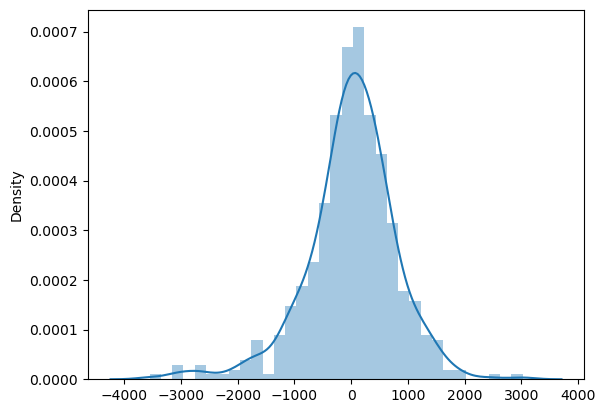

In [48]:
# Conduct Residual Analysis
res=y_train-y_train_pred
#Plot the residues
sns.distplot(res)

In [49]:
# We can see that residues are normally distributed

In [50]:
# Step-5: Preditions & Evaluation on the Test Set

In [51]:
# Create a list of numeric vars
vars=['temp','atemp','hum','windspeed']
# Fit the dataset
df_test[vars]=scaler.transform(df_test[vars])
df_test.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
184,185,04-07-2018,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,3065,2978,6043,0,0,1,0,0,0
535,536,20-06-2019,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,872,5339,6211,1,0,0,0,1,0
299,300,27-10-2018,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,240,2419,2659,0,0,1,0,0,1
221,222,10-08-2018,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,884,3896,4780,1,0,0,0,0,0
152,153,02-06-2018,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,736,4232,4968,1,0,0,0,1,0


In [52]:
df_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,358.127273,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,876.177273,3684.381818,4560.559091,0.654545,0.027273,0.318182,0.254545,0.263636,0.236364
std,214.116582,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,711.161138,1518.870624,1904.968544,0.476601,0.163248,0.466833,0.436599,0.441609,0.425817
min,4.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.500000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,338.250000,2507.750000,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,741.000000,3674.000000,4582.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.750000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,1189.000000,4640.250000,5913.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Creating y_test & x_test
y_test=df_test.pop('cnt')
x_test=df_test.drop(['instant','dteday','casual','registered'], axis=1)
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [60]:
x_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,1,0,0,0
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,1,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,1,0,0,0,0,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,1,0


In [62]:
# Add a constant
X_test_sm=sm.add_constant(x_test)
X_test_sm

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,season_Spring,season_Summer,season_Winter
184,1.0,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,1,0,0,0
535,1.0,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,1,0
299,1.0,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,1
221,1.0,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,1,0,0,0,0,0
152,1.0,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,12,0,2,1,0.519232,0.511907,0.756118,0.283397,1,0,0,0,0,1
127,1.0,0,5,0,0,0,0.584649,0.577380,0.650923,0.069510,1,0,0,0,1,0
640,1.0,1,10,0,3,1,0.745598,0.682653,0.817947,0.052115,0,0,1,0,0,1
72,1.0,0,3,0,1,1,0.331557,0.332005,0.512107,0.203418,1,0,0,1,0,0


In [64]:
# Dropping variables atemp, weathersit_Clear & mnth from test set
X_test_sm=X_test_sm.drop(['mnth','atemp','weathersit_Clear'],axis=1)

In [65]:
# Using the model to predict
y_test_pred=lr_model.predict(X_test_sm)

In [67]:
# Evaluate the predictions

#Importing the required modules
from sklearn.metrics import r2_score

#Calculatig r2_score
r2 = r2_score(y_test, y_test_pred)
print(r2)


0.8096391848904636


In [68]:
# The r2_score is 0.80